In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('New_wine.csv')

In [3]:
df.head()

,Type,comp10,comp11,comp12
0,1,0.015088,-0.092323,-0.014517
1,1,0.001467,-0.097102,0.003301
2,1,-0.055385,-0.087528,0.005045
3,1,-0.005911,0.148442,-0.076966
4,1,-0.098150,-0.059302,-0.015295


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    178 non-null    int64  
 1   comp10  178 non-null    float64
 2   comp11  178 non-null    float64
 3   comp12  178 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 5.7 KB


In [9]:
df.describe()

,Type,comp10,comp11,comp12
count,178.000000,1.780000e+02,1.780000e+02,1.780000e+02
mean,1.938202,-2.520222e-17,-8.595652e-18,-1.356593e-17
std,0.775035,9.826445e-02,9.493842e-02,6.889449e-02
min,1.000000,-2.608826e-01,-2.734913e-01,-2.114470e-01
25%,1.000000,-5.767476e-02,-6.514851e-02,-4.094689e-02
50%,2.000000,-1.675461e-03,2.204527e-03,-6.746553e-04
75%,3.000000,5.261286e-02,6.488802e-02,3.364846e-02
max,3.000000,2.757012e-01,3.008802e-01,3.274476e-01


# Outlier Treatment

Type         AxesSubplot(0.125,0.71587;0.168478x0.16413)
comp10    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
comp11    AxesSubplot(0.529348,0.71587;0.168478x0.16413)
comp12    AxesSubplot(0.731522,0.71587;0.168478x0.16413)
dtype: object

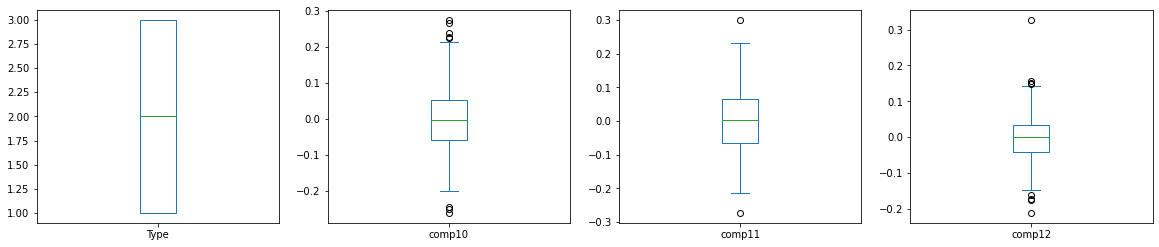

In [5]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(20,18))

In [6]:
# First Column
iqr = df['comp10'].quantile(0.75) - df['comp10'].quantile(0.25)
iqr

0.11028761448362576

In [7]:
lower_limit = df['comp10'].quantile(0.25) - 1.5*(iqr)
lower_limit

-0.22310617939652588

In [8]:
upper_limit = df['comp10'].quantile(0.75) + 1.5*(iqr)
upper_limit

0.21804427853797712

In [10]:
df['comp10'] = np.where(df['comp10'] > upper_limit, upper_limit, np.where(df['comp10'] < lower_limit, lower_limit, df['comp10']))

In [11]:
# Second Column
iqr = df['comp11'].quantile(0.75) - df['comp11'].quantile(0.25)
iqr

0.13003653391761374

In [12]:
lower_limit = df['comp11'].quantile(0.25) - 1.5*(iqr)
lower_limit

-0.26020331463965385

In [13]:
upper_limit = df['comp11'].quantile(0.75) + 1.5*(iqr)
upper_limit

0.25994282103080113

In [14]:
df['comp11'] = np.where(df['comp11'] > upper_limit, upper_limit, np.where(df['comp11'] < lower_limit, lower_limit, df['comp11']))

In [15]:
# Third Column
iqr = df['comp12'].quantile(0.75) - df['comp12'].quantile(0.25)
iqr

0.074595352462758

In [17]:
lower_limit = df['comp12'].quantile(0.25) - 1.5*(iqr)
lower_limit

-0.1528399209775185

In [18]:
upper_limit = df['comp12'].quantile(0.75) + 1.5*(iqr)
upper_limit

0.1455414888735135

In [19]:
df['comp12'] = np.where(df['comp12'] > upper_limit, upper_limit, np.where(df['comp12'] < lower_limit, lower_limit, df['comp12']))

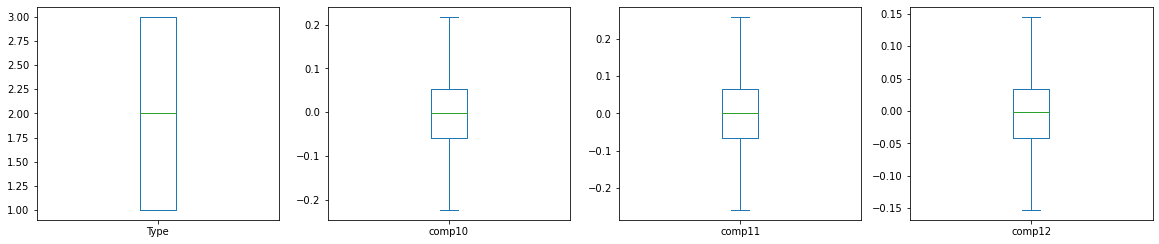

In [21]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(20,18));

# Normalization 

In [22]:
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return(x)

In [23]:
df_norm = norm_func(df.iloc[:,1:])

In [24]:
df_norm

,comp10,comp11,comp12
0,0.539938,0.322756,0.463576
1,0.509063,0.313567,0.523295
2,0.380190,0.331974,0.529138
3,0.492338,0.785635,0.254284
4,0.283252,0.386240,0.460972
...,...,...,...
173,0.599642,0.486375,0.415592
174,0.510872,0.650864,0.374638
175,0.957468,0.485159,0.519018
176,0.671911,0.524244,0.471347


In [25]:
df_norm.describe()

,comp10,comp11,comp12
count,178.000000,178.000000,178.000000
mean,0.504998,0.499952,0.510473
std,0.215552,0.180795,0.212379
min,0.000000,0.000000,0.000000
25%,0.375000,0.375000,0.375000
50%,0.501939,0.504489,0.509969
75%,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000


# Linkage and Dendrograme

In [26]:
z = linkage(df_norm, method = "complete", metric = "euclidean")

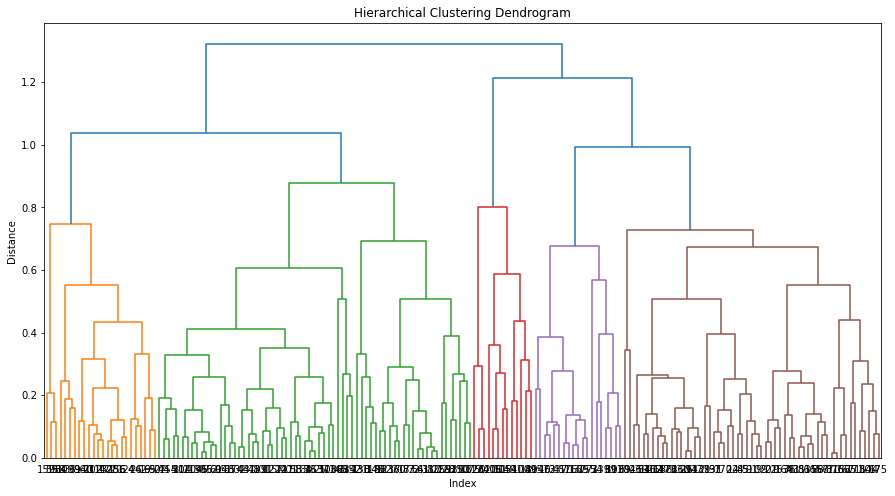

In [27]:
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dendrogram(z, leaf_rotation = 0, leaf_font_size = 10)
plt.show()

In [28]:
h_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = "euclidean").fit(df_norm) 
h_complete.labels_

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1])

In [29]:
cluster_labels = pd.Series(h_complete.labels_)

In [30]:
df['Clust'] = cluster_labels

In [31]:
df.head()

,Type,comp10,comp11,comp12,Clust
0,1,0.015088,-0.092323,-0.014517,1
1,1,0.001467,-0.097102,0.003301,1
2,1,-0.055385,-0.087528,0.005045,1
3,1,-0.005911,0.148442,-0.076966,1
4,1,-0.098150,-0.059302,-0.015295,0


In [32]:
df1 = df.iloc[:, [4,0,1,2,3]]

In [33]:
df1

,Clust,Type,comp10,comp11,comp12
0,1,1,0.015088,-0.092323,-0.014517
1,1,1,0.001467,-0.097102,0.003301
2,1,1,-0.055385,-0.087528,0.005045
3,1,1,-0.005911,0.148442,-0.076966
4,0,1,-0.098150,-0.059302,-0.015295
...,...,...,...,...,...
173,1,3,0.041426,-0.007217,-0.028835
174,0,3,0.002265,0.078341,-0.041055
175,1,3,0.199281,-0.007850,0.002025
176,1,3,0.073307,0.012480,-0.012199


In [34]:
df1.iloc[:, 2:].groupby(df1.Clust).mean()

,comp10,comp11,comp12
Clust,,,
0,-0.066157,0.014727,0.013164
1,0.062158,-0.010113,-0.031537
2,0.104811,-0.047649,0.080187


In [35]:
df1.iloc[:, 2:].groupby(df1.Clust).median()

,comp10,comp11,comp12
Clust,,,
0,-0.055415,0.027576,0.016101
1,0.049966,-0.023080,-0.024968
2,0.072348,-0.062293,0.091995


In [36]:
df1.iloc[:, 2:].groupby(df1.Clust).std()

,comp10,comp11,comp12
Clust,,,
0,0.062596,0.083122,0.063402
1,0.070975,0.096942,0.045275
2,0.066532,0.129298,0.046961


In [37]:
df1.iloc[:, 2:].groupby(df1.Clust).var()

,comp10,comp11,comp12
Clust,,,
0,0.003918,0.006909,0.004020
1,0.005037,0.009398,0.002050
2,0.004426,0.016718,0.002205
